In [156]:
import fenics as fen
import mshr
import helpers
import numpy as np
import scipy.sparse
import scipy.sparse.linalg

height = 1.0 # radius of wire
width = 5.0 # radius of domain
mu = 1.0 # 4*np.pi*1e-7 # magnetic permeability inside waveguide
eps = 1.0 # 8.854187e-12 # electric permittivity inside waveguide

domain = mshr.Rectangle(fen.Point(0.0, 0.0), fen.Point(width, height))
mesh = mshr.generate_mesh(domain, 500)

V = fen.FunctionSpace(mesh, 'P', 1)
A_z = fen.TrialFunction(V)
v_z = fen.TestFunction(V)

dx = fen.Measure('dx', domain=mesh)
a_stiff = (1 / mu)*fen.dot(fen.grad(A_z), fen.grad(v_z))*dx
a_mass = eps*A_z*v_z*dx
a = a_stiff - (2*np.pi*f)**2 * a_mass

In [157]:
M = fen.assemble(a_stiff)
Mmat = fen.as_backend_type(M).mat()
a_stiff_sparse = scipy.sparse.coo_matrix(scipy.sparse.csr_matrix(Mmat.getValuesCSR()[::-1]))
M = fen.assemble(a_mass)
Mmat = fen.as_backend_type(M).mat()
a_mass_sparse = scipy.sparse.coo_matrix(scipy.sparse.csr_matrix(Mmat.getValuesCSR()[::-1]))
np.sum(np.abs(a_mass_sparse - a_mass_sparse.T))

0.0

In [240]:
ev = scipy.sparse.linalg.eigsh(a_stiff_sparse, k=4, M=a_mass_sparse, sigma=0, which='LM')
np.sqrt(ev[0])

array([  2.23716012e-07,   6.28318905e-01,   1.25664006e+00,
         1.88496572e+00])

In [176]:
# Can't find smallest magnitude eigenvalue!
# ev = scipy.sparse.linalg.eigsh(a_stiff_sparse, k=1, M=a_mass_sparse, which='SM')

In [237]:
#np.pi*pow(1**2/height**2 + 6**2/(2*width)**2 , 0.5)
np.pi*pow(0**2/(height)**2 + 4**2/(width)**2 , 0.5)

2.5132741228718345

In [18]:
scipy.sparse.save_npz('sparse_matrix.npz', mat)
sparse_matrix = scipy.sparse.load_npz('sparse_matrix.npz')

In [197]:
M = 10
h = 1/M
L = np.zeros((M, M))
K = np.zeros((M, M))
for m in range(1,M-1):
    for n in range(M):
        if n == m:
            L[m, n] = 2/h
            K[m, n] = 2*h/3
        if abs(n - m) == 1:
            L[m, n] = -1/h
            K[m, n] = h/6
L[0, 0] = 1
L[M-1, M-1] = 1
K[0, 0] = 1  # u(0) = 1
K[M-1, M-1] = 1  # u(1) = 0.5

L_sparse = scipy.sparse.coo_matrix(L)
K_sparse = scipy.sparse.coo_matrix(K)
print(K)
ev = scipy.sparse.linalg.eigsh(L_sparse, k=7, M=K_sparse, which='SM')
ev[0]

[[ 1.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.01666667  0.06666667  0.01666667  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.01666667  0.06666667  0.01666667  0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.01666667  0.06666667  0.01666667  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.01666667  0.06666667  0.01666667
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.01666667  0.06666667
   0.01666667  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.01666667
   0.06666667  0.01666667  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.01666667  0.06666667  0.01666667  0.        ]
 [ 0.          0.          0.          0

array([   0.84085381,    1.0000078 ,   11.72757742,   51.03516971,
        120.34327896,  228.34365089,  385.02809558])

In [95]:
ev = scipy.sparse.linalg.eigsh(a_stiff_sparse, k=10, M=a_mass_sparse, sigma=6)#, which='SM')
np.sqrt(ev[0])

array([  4.21468485e-08,   6.29288252e-01,   1.25664675e+00,
         1.88403528e+00,   2.51364043e+00,   3.13263331e+00,
         3.14433209e+00,   3.20235588e+00,   3.37735555e+00,
         3.65595658e+00])

In [105]:
mesh = fen.IntervalMesh(10, 0, 1)
V = fen.FunctionSpace(mesh, 'P', 1)

bc = fen.DirichletBC(V, fen.Constant(0), 'on_boundary')

# Setting up the variational problem
u = fen.TrialFunction(V)
v = fen.TestFunction(V)
f = fen.Constant(1)
a_mass = fen.dot(fen.grad(u), fen.grad(v))*dx
a_stiff = u*v*dx
L = f*v*dx
lbda = 1.0
a = a_mass - lbda * a_stiff

# solving the variational problem.
u = fen.Function(V)
fen.solve( a == L, u, bc)

# plotting solution
plot(u, interactive = True)

KeyError: Mesh(VectorElement(FiniteElement('Lagrange', interval, 1), dim=1), 127)

Calling FFC just-in-time (JIT) compiler, this may take some time.


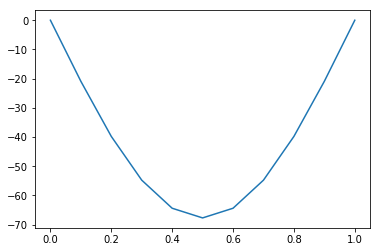

In [130]:
mesh = fen.IntervalMesh(10, 0, 1)

# definig Function space on this mesh using Lagrange polynoimals of degree 2.
V = fen.FunctionSpace(mesh, 'P', 1)

# Enforcing u = u0 at x = 0
bc = fen.DirichletBC(V, fen.Constant(0), 'on_boundary')

# Setting up the variational problem
u = fen.TrialFunction(V)
v = fen.TestFunction(V)
f = fen.Constant(1)
g = fen.Constant(1)
a_mass = fen.dot(fen.grad(u), fen.grad(v))*dx
a_stiff = fen.dot(u,v)*dx
a = a_mass - 9.97*a_stiff
L = f*v*dx

# solving the variational problem.
u = fen.Function(V)
fen.solve( a == L, u, bc)

# plotting solution
fen.plot(u)

In [132]:
M = fen.assemble(a_stiff)
Mmat = fen.as_backend_type(M).mat()
a_stiff_sparse = scipy.sparse.coo_matrix(scipy.sparse.csr_matrix(Mmat.getValuesCSR()[::-1]))
M = fen.assemble(a_mass)
Mmat = fen.as_backend_type(M).mat()
a_mass_sparse = scipy.sparse.coo_matrix(scipy.sparse.csr_matrix(Mmat.getValuesCSR()[::-1]))
np.sum(np.abs(a_mass_sparse - a_mass_sparse.T))
np.sum(np.abs(a_stiff_sparse - a_stiff_sparse.T))

0.0

In [151]:
ev = scipy.sparse.linalg.eigsh(a_stiff_sparse, k=3, M=a_mass_sparse)
ev[0]

array([ -3.33447446e+36,   1.11863800e+36,   3.33447454e+36])